In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import tensorflow as tf
import keras
import sys
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score, classification_report
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Dropout, BatchNormalization, Flatten
from keras import Input
from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

* airplane : 0
* automobile : 1
* bird : 2
* cat : 3
* deer : 4
* dog : 5
* frog : 6
* horse : 7
* ship : 8
* truck : 9

In [122]:
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

In [123]:
print('X_train shape::: ',X_train.shape)
print('X_test shape::: ',X_test.shape)
print('y_train shape::: ',y_train.shape)
print('y_test shape::: ',y_test.shape)

X_train shape:::  (50000, 32, 32, 3)
X_test shape:::  (10000, 32, 32, 3)
y_train shape:::  (50000, 1)
y_test shape:::  (10000, 1)


In [124]:
X_train = X_train/255.0
X_test = X_test/255.0

In [125]:
X_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [126]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [127]:
y_test2 = y_test

In [128]:
def disp_img(X,y):
    labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck']
    fig,ax = plt.subplots(5,5,sharey=False, tight_layout=True, figsize=(17,17), facecolor='white')
    n=0
    for i in range(0,5):
        for j in range(0,5):
            ax[i,j].matshow(X[n])
            index = int(y[n])
            ax[i,j].set_title(labels[index],fontsize=8)
            n=n+1
    plt.show()

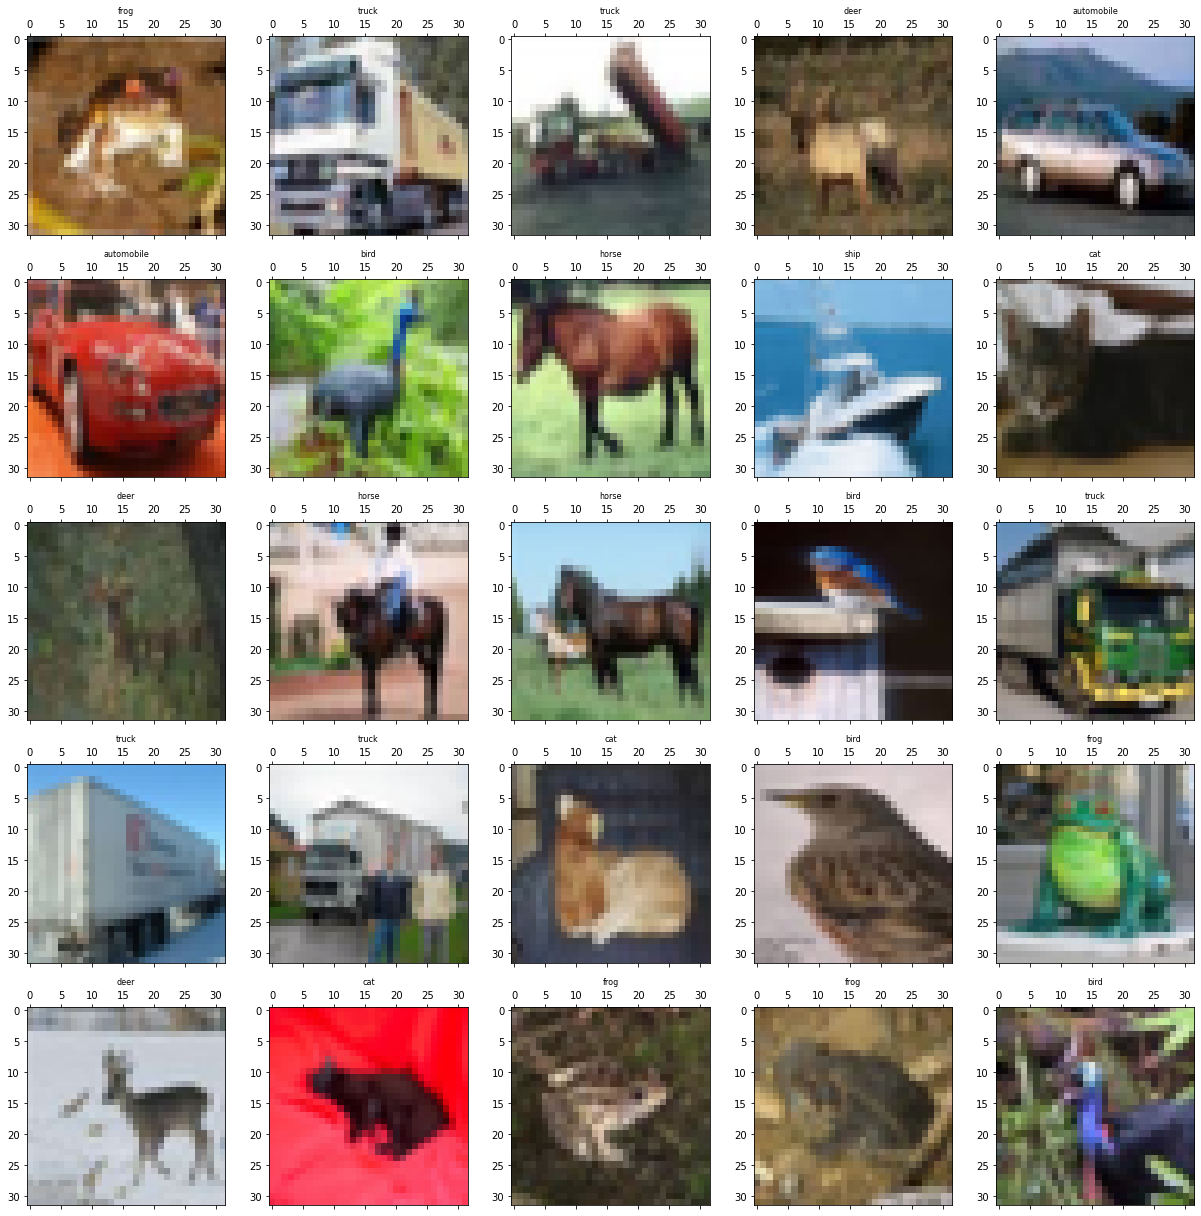

In [129]:
disp_img(X_train,y_train)

In [130]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [131]:
y_train.shape

(50000, 10)

# ANN model

In [132]:
def ann_model():
    model = Sequential()
    model.add(Flatten(input_shape=(32,32,3)))
    model.add(Dense(128,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(32,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(10,activation='softmax'))
    
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    return model

In [133]:
model_ann = ann_model()

In [134]:
history_ann = model_ann.fit(X_train,y_train,epochs=10,validation_split=0.2,validation_data=(X_test,y_test))

Epoch 1/10
1250/1250 [==============================] - 9s 6ms/step - loss: 1.7847 - accuracy: 0.3668 - val_loss: 1.8483 - val_accuracy: 0.3446
Epoch 2/10
1250/1250 [==============================] - 7s 6ms/step - loss: 1.6487 - accuracy: 0.4130 - val_loss: 1.7303 - val_accuracy: 0.3895
Epoch 3/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.5940 - accuracy: 0.4360 - val_loss: 1.7060 - val_accuracy: 0.3916
Epoch 4/10
1250/1250 [==============================] - 7s 5ms/step - loss: 1.5570 - accuracy: 0.4478 - val_loss: 1.9534 - val_accuracy: 0.3472
Epoch 5/10
1250/1250 [==============================] - 7s 6ms/step - loss: 1.5255 - accuracy: 0.4637 - val_loss: 1.5934 - val_accuracy: 0.4440
Epoch 6/10
1250/1250 [==============================] - 7s 5ms/step - loss: 1.4993 - accuracy: 0.4707 - val_loss: 1.5654 - val_accuracy: 0.4519
Epoch 7/10
1250/1250 [==============================] - 8s 7ms/step - loss: 1.4799 - accuracy: 0.4748 - val_loss: 1.5554 - val_accuracy:

In [135]:
y_pred = np.argmax(model_ann.predict(X_test),axis=1)

In [136]:
def evaluation(model):
    loss,accuracy = model.evaluate(X_test,y_test)
    print('loss = ',np.round(loss,5))
    print('accuracy = ',np.round(accuracy*100,2))

In [137]:
evaluation(model_ann)

313/313 [==============================] - 1s 2ms/step - loss: 1.5632 - accuracy: 0.4453
loss =  1.56321
accuracy =  44.53


In [138]:
y_pred

array([3, 9, 0, ..., 3, 5, 7], dtype=int64)

In [139]:
print(classification_report(y_test2,y_pred))

              precision    recall  f1-score   support

           0       0.57      0.40      0.47      1000
           1       0.62      0.46      0.53      1000
           2       0.26      0.49      0.34      1000
           3       0.32      0.27      0.30      1000
           4       0.44      0.29      0.35      1000
           5       0.41      0.38      0.39      1000
           6       0.44      0.59      0.51      1000
           7       0.46      0.57      0.51      1000
           8       0.70      0.48      0.57      1000
           9       0.53      0.52      0.53      1000

    accuracy                           0.45     10000
   macro avg       0.47      0.45      0.45     10000
weighted avg       0.47      0.45      0.45     10000



In [142]:
def predict_image(index):
    plt.matshow(X_test[index])
    y_ind = int(y_test2[index])
    labels = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']
    plt.title(labels[y_ind])
    y_ind2 = int(y_pred[index])
    print('predicted item name ::: ',labels[y_ind2])

predicted item name :::  frog


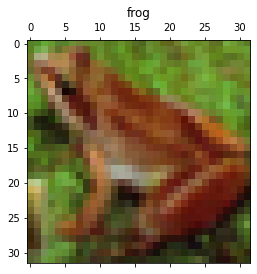

In [146]:
predict_image(29)

predicted item name :::  truck


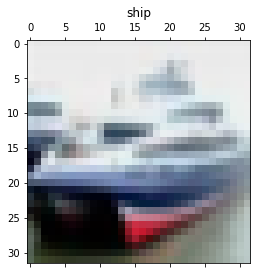

In [150]:
predict_image(1)